In [2]:
import pandas as pd

data = {
    'CustomerID': [1,2,3,4,5,6,7,8,9,10],
    'Annual Income': [15,16,17,18,19,20,21,22,23,24],
    'Spending Score': [39,81,6,77,40,76,6,94,3,72]
}

df = pd.DataFrame(data)



In [4]:
df.head(10)

,CustomerID,Annual Income,Spending Score
0,1,15,39
1,2,16,81
2,3,17,6
3,4,18,77
4,5,19,40
5,6,20,76
6,7,21,6
7,8,22,94
8,9,23,3
9,10,24,72


In [5]:
X = df[['Annual Income', 'Spending Score']]

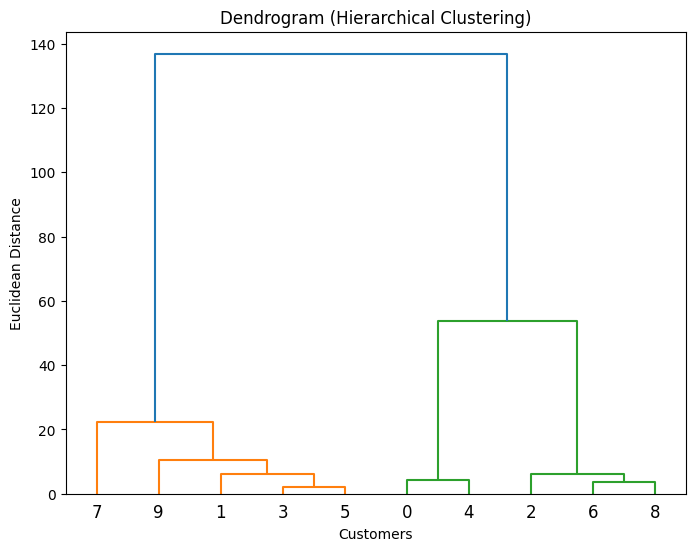

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(8,6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

In [14]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
df['Cluster'] = hc.fit_predict(X)

print("✅ Final cluster assignments:")
print(df[['CustomerID', 'Annual Income', 'Spending Score', 'Cluster']])

✅ Final cluster assignments:
   CustomerID  Annual Income  Spending Score  Cluster
0           1             15              39        2
1           2             16              81        0
2           3             17               6        1
3           4             18              77        0
4           5             19              40        2
5           6             20              76        0
6           7             21               6        1
7           8             22              94        0
8           9             23               3        1
9          10             24              72        0


In [15]:
for cluster_id in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_id]
    avg_income = cluster_data['Annual Income'].mean()
    avg_spending = cluster_data['Spending Score'].mean()
    
    if avg_spending > 60:
        insight = "High spenders – Valuable customers, focus on retention & VIP offers."
    elif avg_spending < 20:
        insight = "Low spenders – Low engagement, need marketing campaigns or discounts."
    else:
        insight = "Moderate spenders – Average customers, can be grown with loyalty programs."
    
    print(f"\nCluster {cluster_id}:")
    print(f"- Customers: {list(cluster_data['CustomerID'])}")
    print(f"- Avg Income = {avg_income:.1f}, Avg Spending = {avg_spending:.1f}")
    print(f"- Insight: {insight}")


Cluster 0:
- Customers: [2, 4, 6, 8, 10]
- Avg Income = 20.0, Avg Spending = 80.0
- Insight: High spenders – Valuable customers, focus on retention & VIP offers.

Cluster 1:
- Customers: [3, 7, 9]
- Avg Income = 20.3, Avg Spending = 5.0
- Insight: Low spenders – Low engagement, need marketing campaigns or discounts.

Cluster 2:
- Customers: [1, 5]
- Avg Income = 17.0, Avg Spending = 39.5
- Insight: Moderate spenders – Average customers, can be grown with loyalty programs.


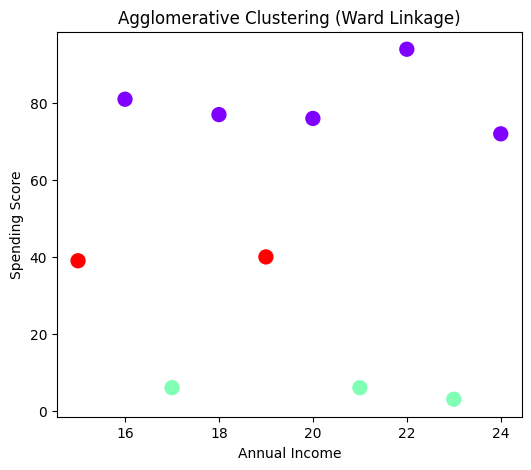

Cluster assignments (Ward):
   CustomerID  Annual Income  Spending Score  Cluster_ward
0           1             15              39             2
1           2             16              81             0
2           3             17               6             1
3           4             18              77             0
4           5             19              40             2
5           6             20              76             0
6           7             21               6             1
7           8             22              94             0
8           9             23               3             1
9          10             24              72             0


In [16]:
hc_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Cluster_ward'] = hc_ward.fit_predict(X)

# Plot
plt.figure(figsize=(6,5))
plt.scatter(X['Annual Income'], X['Spending Score'], 
            c=df['Cluster_ward'], cmap='rainbow', s=100)
plt.title("Agglomerative Clustering (Ward Linkage)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

print("Cluster assignments (Ward):")
print(df[['CustomerID','Annual Income','Spending Score','Cluster_ward']])

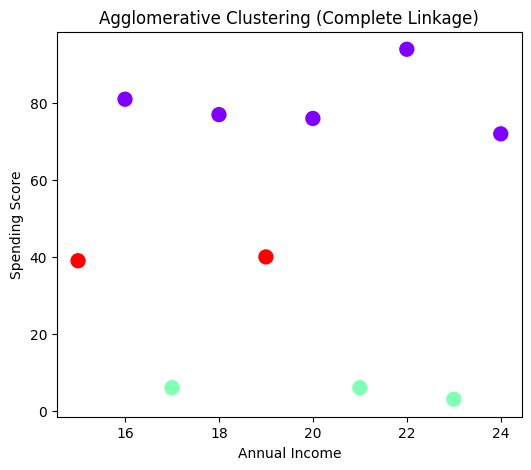

Cluster assignments (Complete):
   CustomerID  Annual Income  Spending Score  Cluster_complete
0           1             15              39                 2
1           2             16              81                 0
2           3             17               6                 1
3           4             18              77                 0
4           5             19              40                 2
5           6             20              76                 0
6           7             21               6                 1
7           8             22              94                 0
8           9             23               3                 1
9          10             24              72                 0


In [18]:
# Complete linkage
hc_complete = AgglomerativeClustering(n_clusters=3, linkage='complete', metric='euclidean')
df['Cluster_complete'] = hc_complete.fit_predict(X)

# Plot
plt.figure(figsize=(6,5))
plt.scatter(X['Annual Income'], X['Spending Score'], 
            c=df['Cluster_complete'], cmap='rainbow', s=100)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

print("Cluster assignments (Complete):")
print(df[['CustomerID','Annual Income','Spending Score','Cluster_complete']])


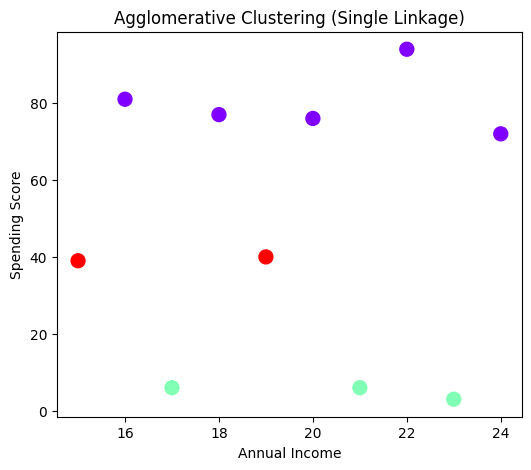

Cluster assignments (Single):
   CustomerID  Annual Income  Spending Score  Cluster_single
0           1             15              39               2
1           2             16              81               0
2           3             17               6               1
3           4             18              77               0
4           5             19              40               2
5           6             20              76               0
6           7             21               6               1
7           8             22              94               0
8           9             23               3               1
9          10             24              72               0


In [19]:
# Single linkage
hc_single = AgglomerativeClustering(n_clusters=3, linkage='single', metric='euclidean')
df['Cluster_single'] = hc_single.fit_predict(X)

# Plot
plt.figure(figsize=(6,5))
plt.scatter(X['Annual Income'], X['Spending Score'], 
            c=df['Cluster_single'], cmap='rainbow', s=100)
plt.title("Agglomerative Clustering (Single Linkage)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

print("Cluster assignments (Single):")
print(df[['CustomerID','Annual Income','Spending Score','Cluster_single']])


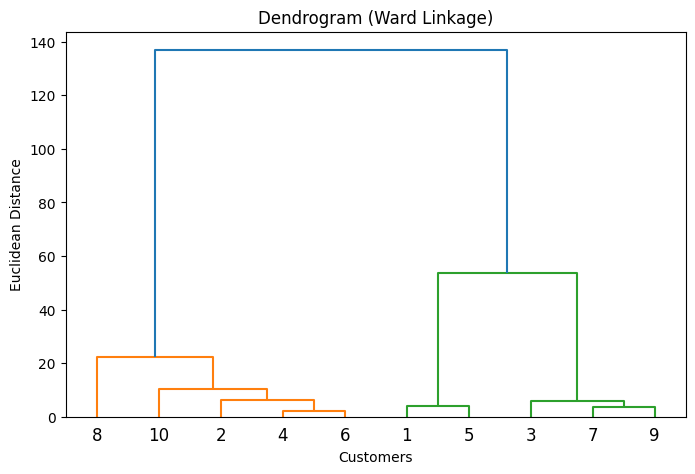

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Dataset
data = {
    'CustomerID':[1,2,3,4,5,6,7,8,9,10],
    'Annual Income':[15,16,17,18,19,20,21,22,23,24],
    'Spending Score':[39,81,6,77,40,76,6,94,3,72]
}
df = pd.DataFrame(data)
X = df[['Annual Income', 'Spending Score']]

# Ward linkage dendrogram
linked_ward = linkage(X, method='ward')

plt.figure(figsize=(8,5))
dendrogram(linked_ward,
           labels=df['CustomerID'].values,
           distance_sort='ascending')
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()


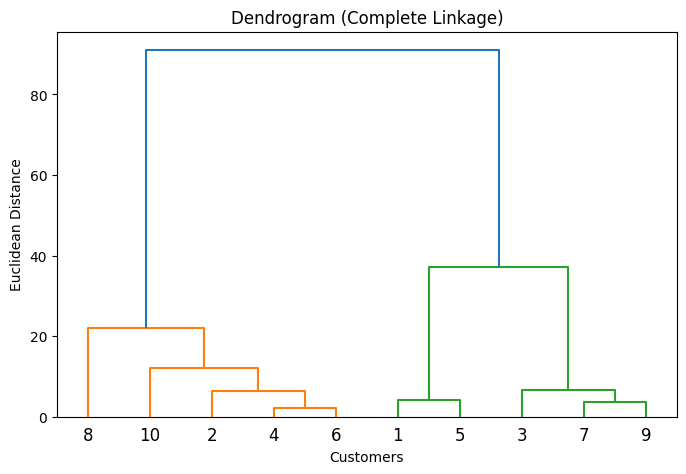

In [22]:
# Complete linkage dendrogram
linked_complete = linkage(X, method='complete')

plt.figure(figsize=(8,5))
dendrogram(linked_complete,
           labels=df['CustomerID'].values,
           distance_sort='ascending')
plt.title("Dendrogram (Complete Linkage)")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()


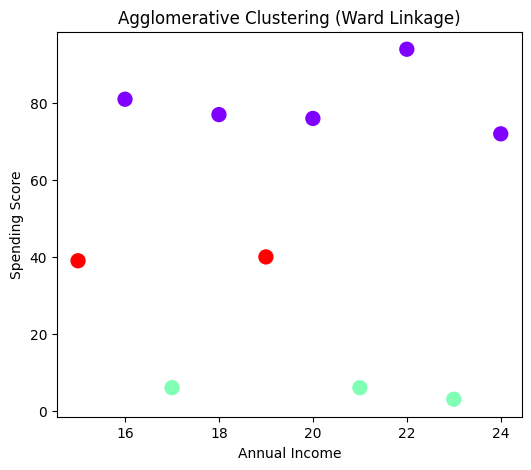

Cluster assignments (Ward):
   CustomerID  Annual Income  Spending Score  Cluster_ward
0           1             15              39             2
1           2             16              81             0
2           3             17               6             1
3           4             18              77             0
4           5             19              40             2
5           6             20              76             0
6           7             21               6             1
7           8             22              94             0
8           9             23               3             1
9          10             24              72             0


In [23]:
hc_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Cluster_ward'] = hc_ward.fit_predict(X)

# Plot
plt.figure(figsize=(6,5))
plt.scatter(X['Annual Income'], X['Spending Score'], 
            c=df['Cluster_ward'], cmap='rainbow', s=100)
plt.title("Agglomerative Clustering (Ward Linkage)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

print("Cluster assignments (Ward):")
print(df[['CustomerID','Annual Income','Spending Score','Cluster_ward']])